# Techniques for handling missing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 1.Mean/ Median/Mode replacement
 replacing the NAN with the most frequent occurance of the variables

In [4]:
df=pd.read_csv("train.csv",usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [6]:
def impute_nan(df,variable,median):
    df[variable+"median"]=df[variable].fillna(median)

In [7]:
median=df.Age.median()

In [8]:
median

28.0

In [9]:
impute_nan(df,"Age",median)

In [10]:
df.head(10)

,Survived,Age,Fare,Agemedian
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
5,0,NaN,8.4583,28.0
6,0,54.0,51.8625,54.0
7,0,2.0,21.0750,2.0
8,1,27.0,11.1333,27.0
9,1,14.0,30.0708,14.0


#### Advantages
Easy to implement(Robust to outliers)
Faster way to obtain the complete dataset 
#### Disadvantages
Change or Distortion in the original variance
Impacts Correlation

# 2.Random Sample Imputation
taking random observation from the dataset and we use this observation to replace the nan values

In [11]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample


In [12]:
impute_nan(df,"Age",median)
df

,Survived,Age,Fare,Agemedian,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0,22.0
1,1,38.0,71.2833,38.0,38.0,38.0
2,1,26.0,7.9250,26.0,26.0,26.0
3,1,35.0,53.1000,35.0,35.0,35.0
4,0,35.0,8.0500,35.0,35.0,35.0
...,...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0,27.0
887,1,19.0,30.0000,19.0,19.0,19.0
888,0,NaN,23.4500,28.0,28.0,15.0
889,1,26.0,30.0000,26.0,26.0,26.0


#### Advantages
    Easy To implement
    There is less distortion in variance
#### Disadvantage
    Every situation randomness wont work

# 3.Capturing NAN values with a new feature

In [13]:
de=pd.read_csv("train.csv",usecols=["Age","Fare","Survived"])


In [14]:
de["Age_nan"]=np.where(de["Age"].isnull(),1,0)

In [15]:
de

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,NaN,23.4500,1
889,1,26.0,30.0000,0


In [16]:
de["Age"].fillna(df.Age.median(),inplace=True)
de.iloc[15:30]

,Survived,Age,Fare,Age_nan
15,1,55.0,16.0000,0
16,0,2.0,29.1250,0
17,1,28.0,13.0000,1
18,0,31.0,18.0000,0
19,1,28.0,7.2250,1
20,0,35.0,26.0000,0
21,1,34.0,13.0000,0
22,1,15.0,8.0292,0
23,1,28.0,35.5000,0
24,0,8.0,21.0750,0


##### Advantages
Easy to implement
Captures the importance of missing values
##### Disadvantages
Creating Additional Features(Curse of Dimensionality)


# 4.End of Distribution imputation

In [17]:
de=pd.read_csv("train.csv",usecols=["Age","Fare","Survived"])

<AxesSubplot:>

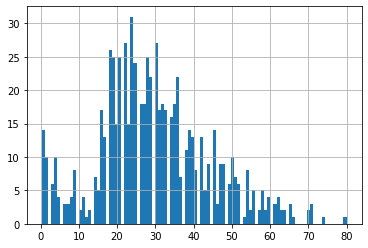

In [18]:
de.Age.hist(bins=100)

In [19]:
extreme=de.Age.mean()+3*de.Age.std()

C:\Users\rashm\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

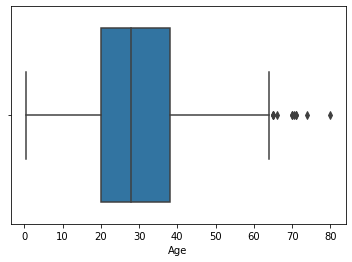

In [20]:
import seaborn as sns
sns.boxplot("Age",data=de)

In [21]:
def impute_na(de,variable,median,extreme):
    de[variable+"end_distribution"]=de[variable].fillna(extreme)
    de[variable].fillna(median,inplace=True)

In [22]:
impute_na(de,"Age",de.Age.median(),extreme)

In [23]:
de

,Survived,Age,Fare,Ageend_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
...,...,...,...,...
886,0,27.0,13.0000,27.00000
887,1,19.0,30.0000,19.00000
888,0,28.0,23.4500,73.27861
889,1,26.0,30.0000,26.00000


<AxesSubplot:>

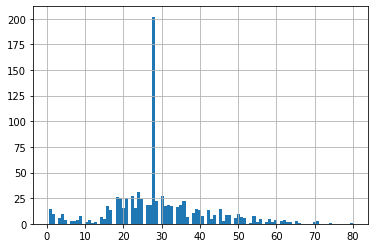

In [24]:
de.Age.hist(bins=100)

<AxesSubplot:>

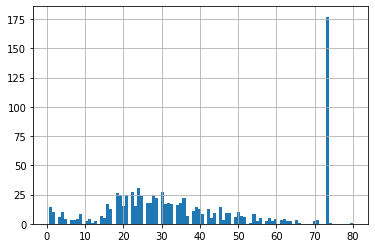

In [25]:
de.Ageend_distribution.hist(bins=100)

C:\Users\rashm\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Ageend_distribution'>

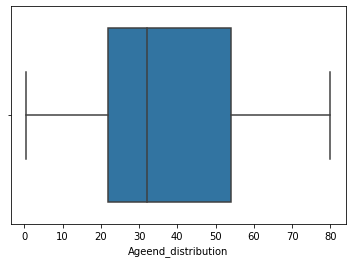

In [27]:
sns.boxplot("Ageend_distribution",data=de)

# 5.Arbitrary imputation

replacing NAN by an arbitrary value

In [33]:
de=pd.read_csv("train.csv",usecols=["Age","Fare","Survived"])

In [34]:
def impute_nan(de,variable):
    de[variable+'_zero']=de[variable].fillna(0)
    de[variable+"_hundred"]=de[variable].fillna(100)

<AxesSubplot:>

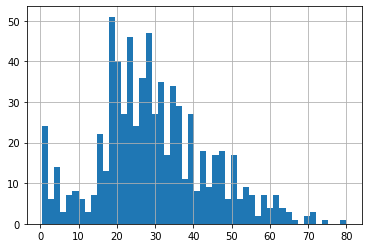

In [35]:
df["Age"].hist(bins=50)

In [36]:
impute_nan(de,"Age")

In [37]:
de

,Survived,Age,Fare,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,0.0,100.0
889,1,26.0,30.0000,26.0,26.0


##### Advantages
Easy to implement
Captures the importance of missingess if there is one
#### Disadvantages
Distorts the original distribution of the variable
If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
Hard to decide which value to use

# 6 Frequent categories imputation
Handle categorical missing values

In [52]:
de=pd.read_csv("train.csv",usecols=["Sex","Embarked","Fare"])

In [53]:
de.head()

,Sex,Fare,Embarked
0,male,7.2500,S
1,female,71.2833,C
2,female,7.9250,S
3,female,53.1000,S
4,male,8.0500,S


In [57]:
de.isnull().sum()

Sex         0
Fare        0
Embarked    2
dtype: int64

Compute the frequency with every feature

<AxesSubplot:xlabel='Embarked'>

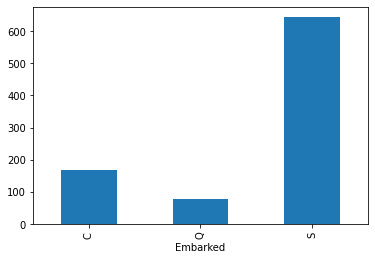

In [59]:
de.groupby(["Embarked"])["Embarked"].count().plot.bar()

In [62]:
de["Embarked"].value_counts().index[0]

'S'

In [63]:
def impute(de,variable):
    most_frequent_category=de[variable].value_counts().index[0]
    de[variable].fillna(most_frequent_category,inplace=True)
    

In [64]:
impute(de,"Embarked")
de

,Sex,Fare,Embarked
0,male,7.2500,S
1,female,71.2833,C
2,female,7.9250,S
3,female,53.1000,S
4,male,8.0500,S
...,...,...,...
886,male,13.0000,S
887,female,30.0000,S
888,female,23.4500,S
889,male,30.0000,C


In [65]:
de.isnull().sum()

Sex         0
Fare        0
Embarked    0
dtype: int64

#### Advantages
    Easy To implement
    Fater way to implement 
#### Disadvantages
    Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's.
    It distorts the relation of the most frequent label